In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

Mounted at /content/drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Create DataFrame

In [3]:
# Original file source : Nfile = "https://drive.google.com/file/d/1pBFL8iiPfFJNhtK_p0R3AlISurpECr60/view?usp=sharing"

netflix = pd.read_csv('/content/drive/My Drive/netflix/netflix_titles.csv')


In [4]:

my_types={
"title":"string",
"director":"string",
"cast":"string",
"country":"string",
"listed_in":"string",
"description":"string", 
"date_added":"string"
}

netflix = pd.read_csv('/content/drive/My Drive/netflix/netflix_titles.csv', dtype=my_types, na_values=["-"])
netflix.info()
netflix.head(3)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   string
 3   director      6173 non-null   string
 4   cast          7982 non-null   string
 5   country       7976 non-null   string
 6   date_added    8797 non-null   string
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   string
 11  description   8807 non-null   string
dtypes: int64(1), object(4), string(7)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,<NA>,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,<NA>,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",<NA>,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


# Data Cleaning 

In [5]:
# Check the unique Values in rating column. 
netflix.rating.unique()

# Value of '74 min', '84 min', '66 min' in 'rating' column should be handled. 
netflix[(netflix.rating == '74 min') | (netflix.rating =='84 min') | (netflix.rating =='66 min')]

netflix.at[5541, 'rating'] = 'NaN'
netflix.at[5794, 'rating'] = 'NaN'
netflix.at[5813, 'rating'] = 'NaN'

netflix.at[5541, 'duration'] = '74 min'
netflix.at[5794, 'duration'] = '84 min'
netflix.at[5813, 'duration'] = '66 min'

# Analysis by type 
### Netflix program consists of 69.6% of Movies and 30.4% of TV Shows. 
### Netflix provides 6131 Movies and 2676 TV shows over the world. 


Text(0.5, 1.0, 'Type analysis')

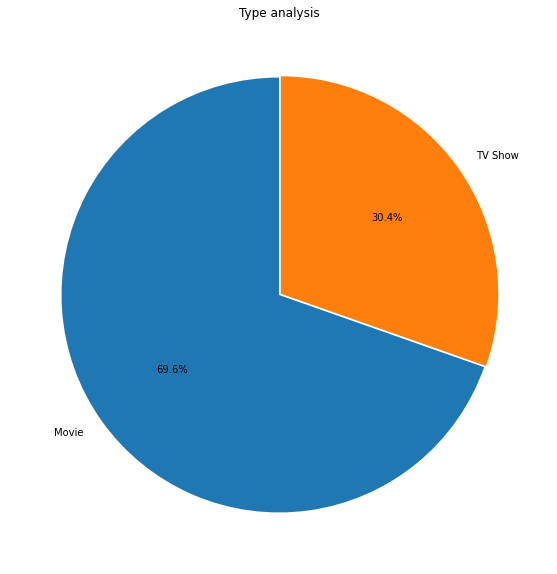

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))
plt.pie(netflix['type'].value_counts(), labels = ['Movie', 'TV Show'], 
        startangle = 90, explode = (0, 0.01), autopct = '%1.1f%%')
plt.title("Type analysis")

# Service top 15 countries 
### The United States has the most programs among the netflix service countries. 
### Netflix provides 2818 programs in the United States. 

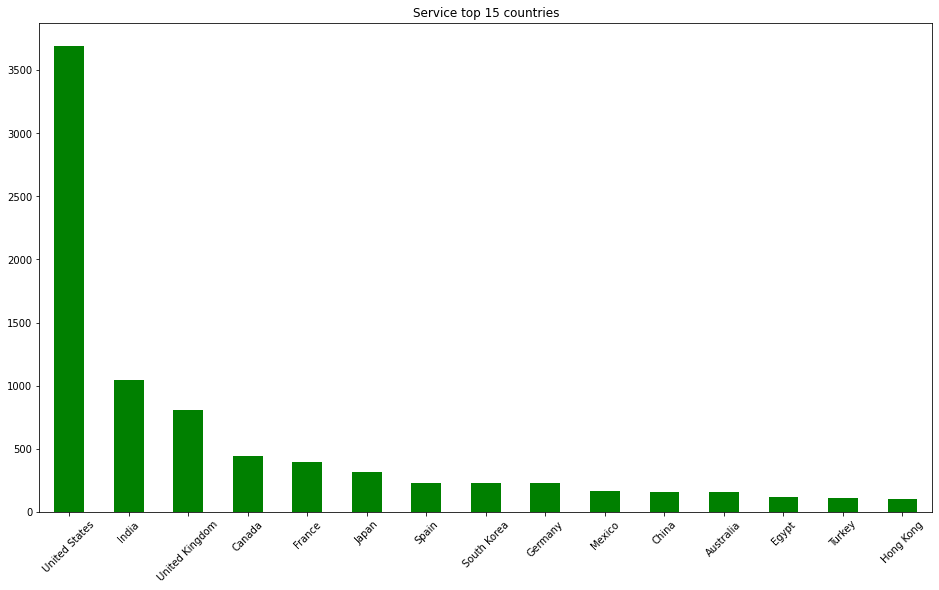

In [ ]:
df = netflix.country.dropna().str.replace(', ',',')
df_sorted = df.str.get_dummies(sep = ',').sum().sort_values(ascending=False)
top15_countries = df_sorted.iloc[0:15]
fig, ax = plt.subplots(figsize = (16,9))
color = 'green'
lines = top15_countries.plot(kind = 'bar', color = color)
plt.title("Service top 15 countries")
plt.xticks(rotation = 45);


# Most frequently casted actors 

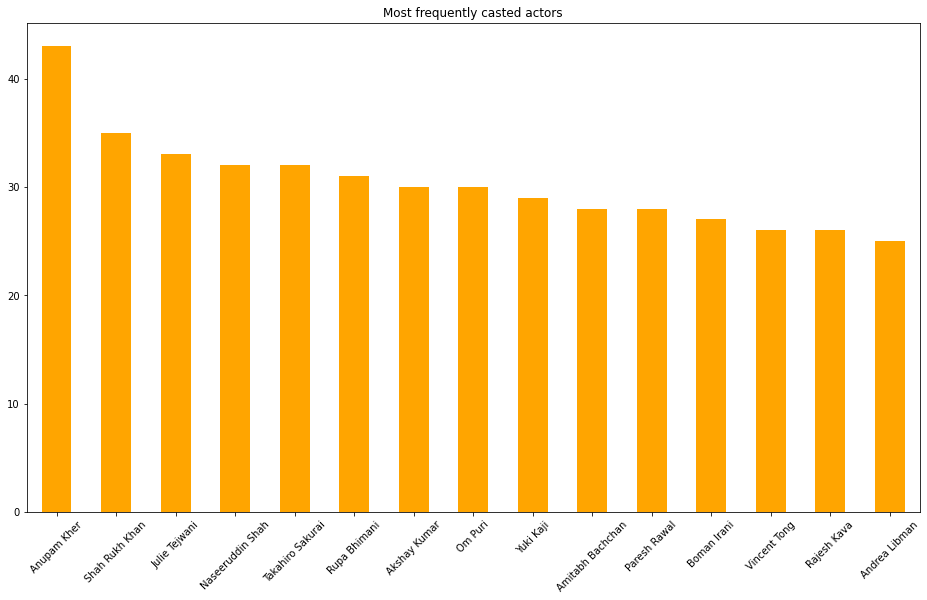

In [ ]:
df = netflix.cast.dropna().str.replace(', ',',')
df_sorted = df.str.get_dummies(sep = ',').sum().sort_values(ascending=False)
top15_frequent_actors = df_sorted.iloc[0:15]
fig, ax = plt.subplots(figsize = (16,9))
color = 'pink'
lines = top15_frequent_actors.plot(kind = 'bar', color = color)
plt.title("Most frequently casted actors")
plt.xticks(rotation = 45);


# Listed-in Netflix Content using Plotly


In [ ]:
def count_combined_data(dataset, column_to_unwrap):
    count = dict()
    for current in dataset[column_to_unwrap]:
        names = [x.strip() for x in current.split(",")]
        for name in names:
            if name == "":
              name = "unknown"
            if name not in count:
              count[name] = 0
            count[name] += 1
            
    counts = {"name": [], "count": []}
    for key, value in count.items():
        counts["name"].append(key) 
        counts["count"].append(value)
    return pd.DataFrame(counts)

In [ ]:
info_listedin = count_combined_data(netflix,"listed_in")

In [ ]:
fig = px.pie(info_listedin.head(10), values = 'count', names='name', title="Top 10 - Frequency of Listed-in Type")
fig.show()

# Directors have more than 10 works in Netflix
### Rajiv Chilaka is the director who has the most number of works on the Netflix programs. 
### Netflix provides 19 works made by Rajiv Chilaka. 

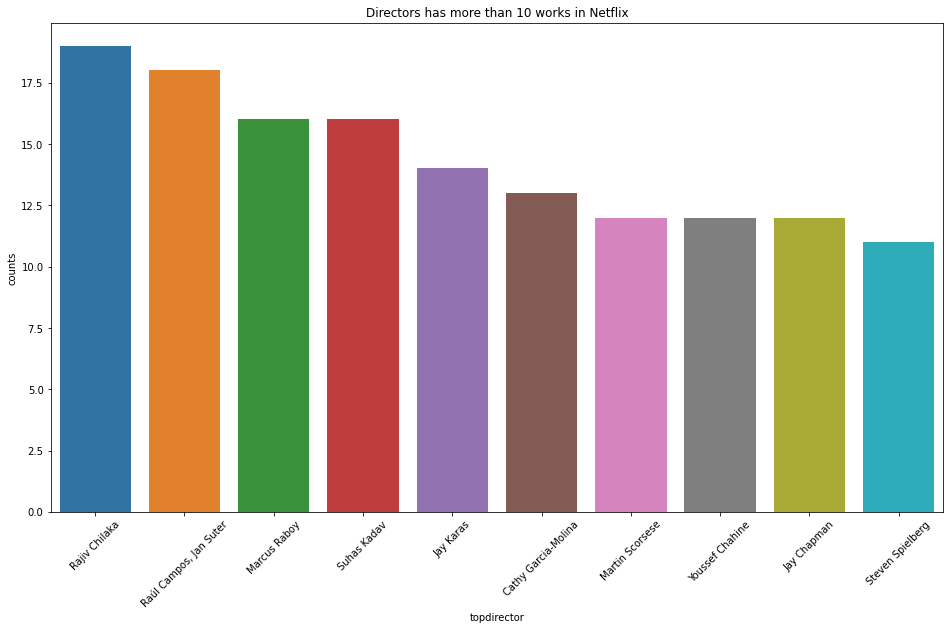

,counts,topdirector
248,19,Rajiv Chilaka
2436,18,"Raúl Campos, Jan Suter"
1418,16,Marcus Raboy
552,16,Suhas Kadav
1509,14,Jay Karas
883,13,Cathy Garcia-Molina
798,12,Martin Scorsese
310,12,Youssef Chahine
1947,12,Jay Chapman
24,11,Steven Spielberg


In [ ]:
director_count = netflix['director'].dropna().value_counts()
directorsList = []
counts = []
for topdirector in netflix.director.dropna().unique():
    directorsList.append(topdirector)
    counts.append(netflix[(netflix.director == topdirector)].show_id.count())
df = pd.DataFrame({'counts': counts , 'topdirector': directorsList})
df_sorted = df.sort_values(by=['counts'], ascending=False)
top20_directors = df_sorted.iloc[0:20: , : ]

more10_directors = top20_directors[(top20_directors.counts > 10)]
fig, ax = plt.subplots(figsize = (16,9))
sns.barplot(data = more10_directors, x = 'topdirector', y = "counts")
plt.title("Directors has more than 10 works in Netflix")
plt.xticks(rotation = 45);
plt.show()

top20_directors



# Year trends for adding Movies on the Netflix
### In 2017 & 2018, Netflix tends to add the most amount of movies. The number of movies released by year decreased since COVID-19
### In 2017 & 2018, Netflix added 767 movies.
### In 2020, Netflix added only 517 and 277 in 2020.

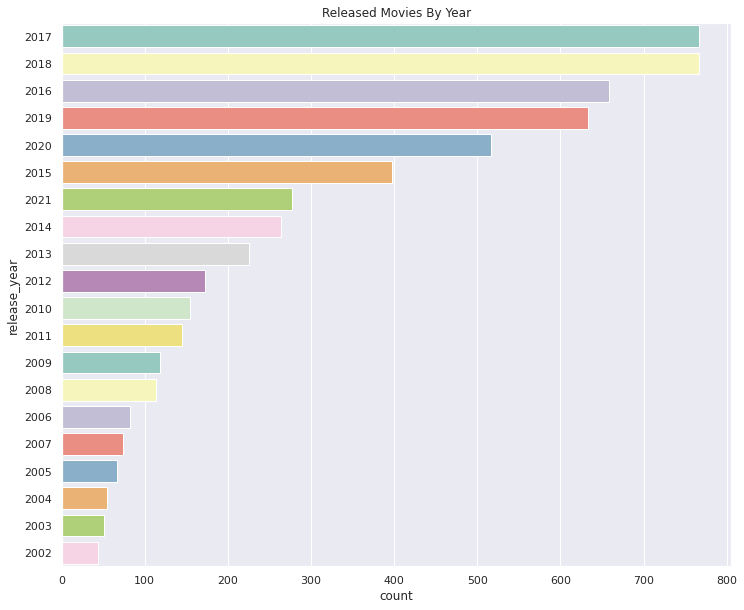

In [ ]:
movie_date = netflix[netflix.type =='Movie'].filter(['show_id','type','release_year'], axis=1)
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y='release_year', data= movie_date,
                   palette='Set3', order = movie_date['release_year'].value_counts().index[0:20])

ax.set_title('Released Movies By Year')
plt.show()

# Year trends for adding TV Shows on the Netflix
### In contrast to Movies Trends, Netflix tends to add the most amount of TV shows by 2020. But, the number of TV shows released in the next year decreased as well because of COVID-19
### In 2020, Netflix added 436 and decreased to 315 TV shows in 2021.

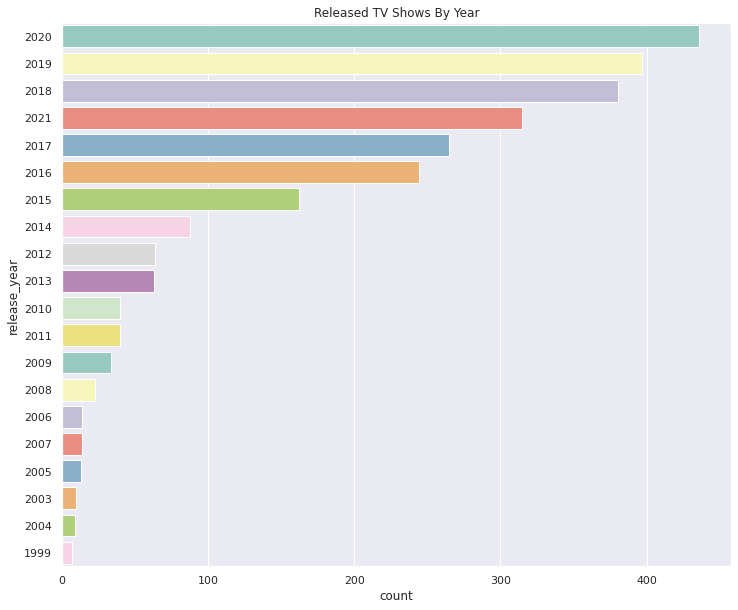

In [ ]:
tvshow_date = netflix[netflix.type =='TV Show'].filter(['show_id','type','release_year'], axis=1)
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y='release_year', data= tvshow_date,
                   palette='Set3', order = tvshow_date['release_year'].value_counts().index[0:20])
ax.set_title('Released TV Shows By Year')
plt.show()

# Month trends for adding programs on the Netflix
### In July, Netflix tends to add the most programs while adding the least in February. 
### In July, Netflix added 827 programs.
### In February, Netflix added 563 programs.

July         827
December     813
September    770
April        764
October      760
August       755
March        742
January      738
June         728
November     705
May          632
February     563
Name: Added_Month, dtype: int64

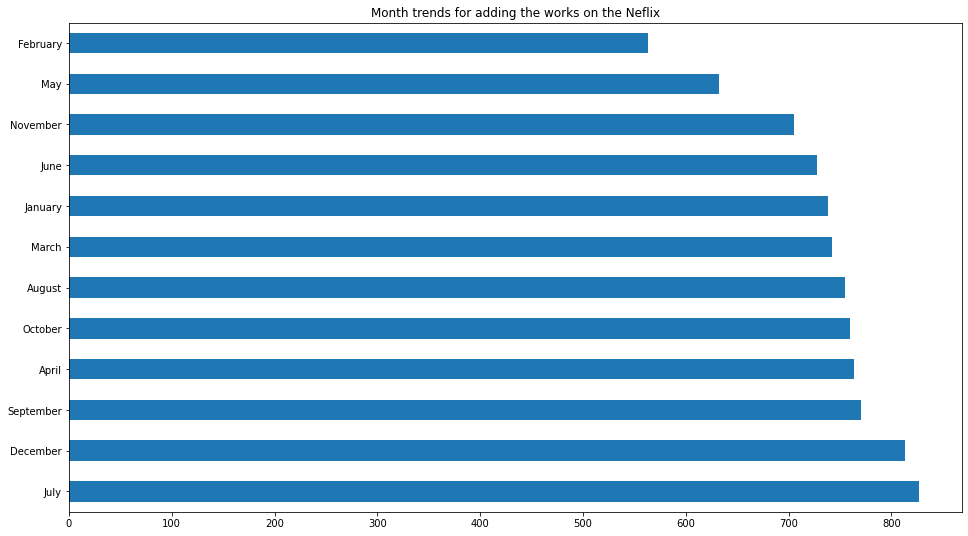

In [ ]:
fig, ax = plt.subplots(figsize = (16,9))
netflix['Added_Month'] = netflix.date_added.str.split().str[0]
lines = netflix['Added_Month'].value_counts().plot(kind = 'barh')
plt.title("Month trends for adding the works on the Neflix")

netflix['Added_Month'].value_counts()


## Analysis of added year by service type
### In 2019, Netflix added the most TV shows and movies.  
### Netflix added 1424 programs in 2019. 


2019.0    1424
2020.0    1284
2018.0    1237
2021.0     993
2017.0     839
2016.0     253
2015.0      56
2014.0      19
2011.0      13
2013.0       6
2012.0       3
2009.0       2
2008.0       1
2010.0       1
Name: Added_Year, dtype: int64

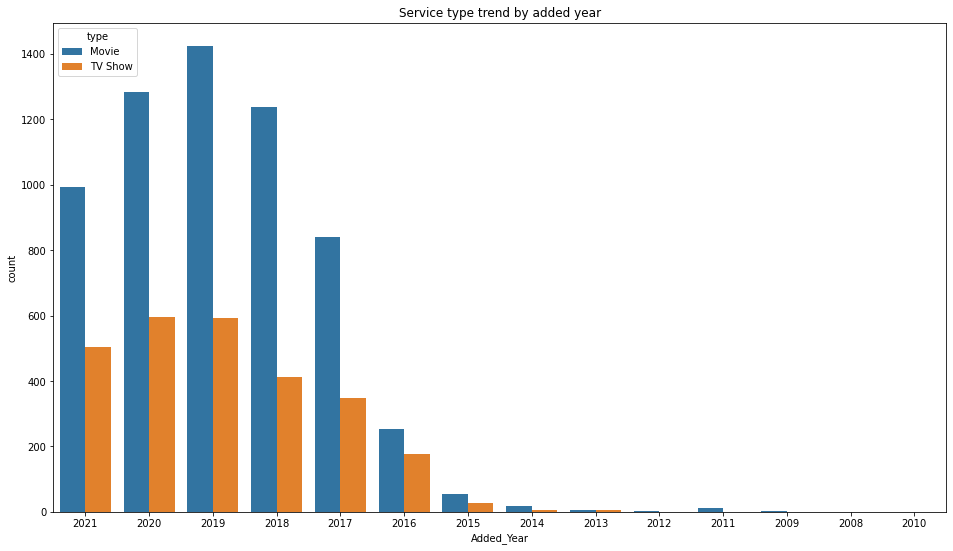

In [ ]:
netflix['Added_Year'] = netflix.date_added.str.split().str[-1]

fig, ax = plt.subplots(figsize = (16,9))
sns.countplot(data = netflix, x=netflix['Added_Year'], hue='type');
plt.title("Service type trend by added year")

netflix['Added_Year'] = netflix['Added_Year'].dropna().astype(str).astype(int)

netflix['Added_Year'].value_counts()
netflix[netflix['type'] == 'Movie']['Added_Year'].value_counts()

## Analysis by Rating
### TV-MA(TV Mature Audience Only) is the highest, and UR is the lowest. 

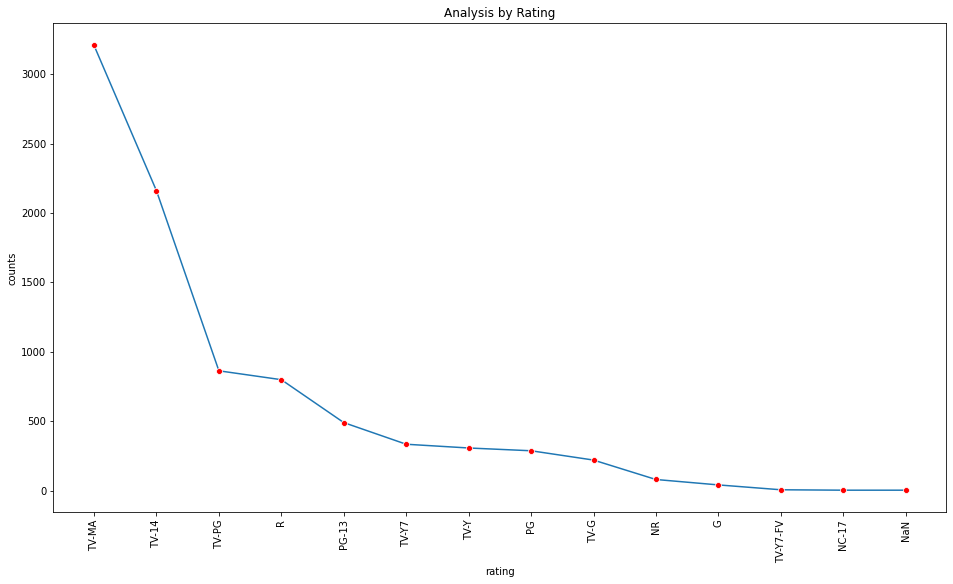

In [ ]:
netflix['rating'].dropna().unique()
ratingList = []
counts = []
for ratings in netflix.rating.dropna().unique():
    ratingList.append(ratings)
    counts.append(netflix[(netflix.rating == ratings)].show_id.count())
df = pd.DataFrame({'counts': counts , 'rating': ratingList})
df_sorted = df.sort_values(by=['counts'], ascending=False)
sorted_by_rating = df_sorted.iloc[0:14: , : ]
fig, ax = plt.subplots(figsize = (16,9))
sns.lineplot(data = sorted_by_rating, x = 'rating', y = "counts", marker = 'o', markerfacecolor = 'r')
plt.title("Analysis by Rating")
plt.xticks(rotation=90);
plt.show()


# Distributions in rating by release_year
### Observation : Rate R and UR movies tend not to be added recently. 

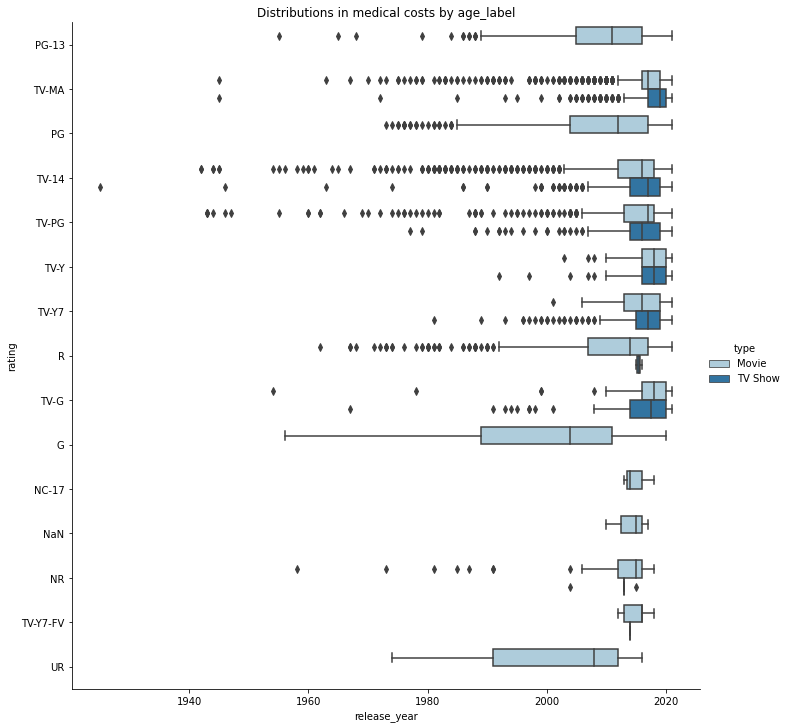

In [ ]:
sns.catplot(
    data=netflix, 
    x="release_year",
    y="rating",
    aspect=1, # aspect change the aspect ratio
    kind="box",
    hue="type",
    height=10,
    palette="Paired"
    ) 
plt.title("Distributions in rating by release_year");

# Distributions in rating by added year 
### Observation : Movies have a more varied rating level, while TV shows have lower rating levels. 

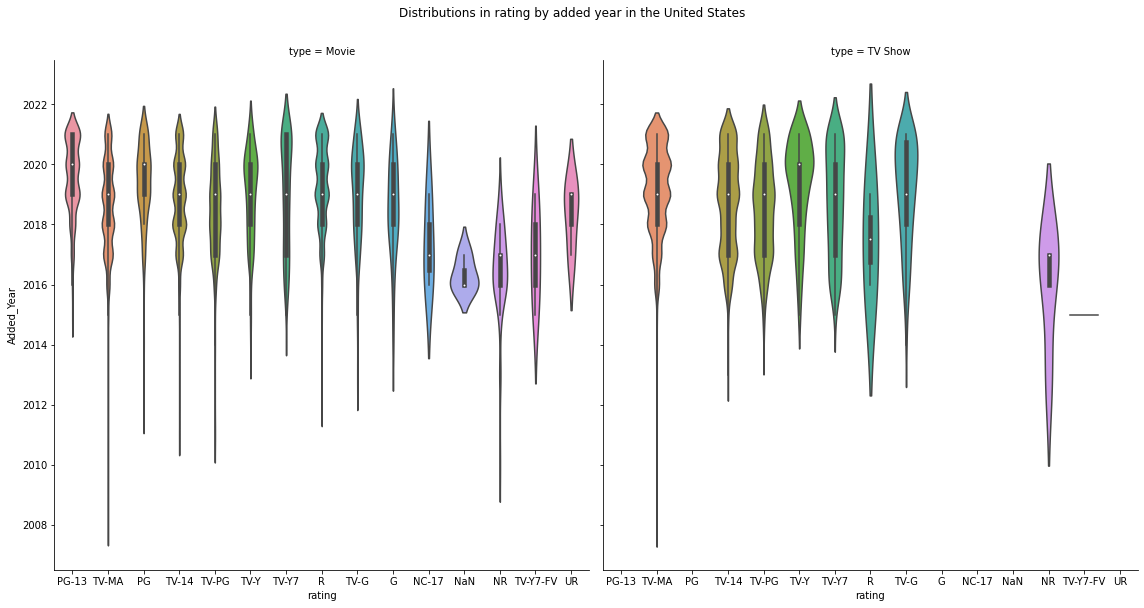

In [ ]:
g = sns.catplot(
    data=netflix,
    x="rating",
    y="Added_Year",
    kind="violin",
    split=True,
    col="type",
    aspect= 1,
    height=8,
    s=2
   ) 
g.fig.suptitle("Distributions in rating by added year", y=1.05);

# Relationships between added year and release year for type

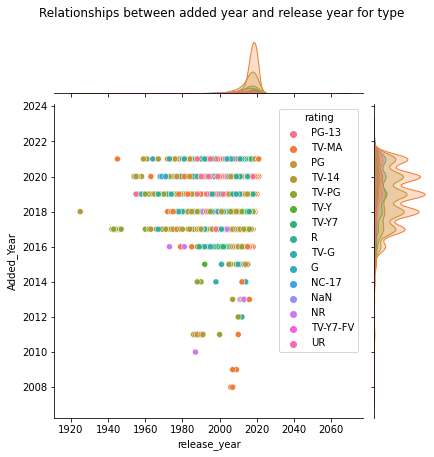

In [ ]:
g=sns.jointplot(
    data = netflix,
    x = "release_year",
    y = "Added_Year",
    hue = "rating"    
)

g.fig.suptitle("Relationships between added year and release year for type", y=1.05);  

# Netflix services analysis in the United States



In [ ]:
netflix_usa = netflix[netflix['country'] == 'United States']
netflix_usa.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Added_Year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,<NA>,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021.0
15,s16,TV Show,Dear White People,<NA>,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,"September 22, 2021",2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...,2021.0
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,2021.0
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,"September 19, 2021",2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...,2021.0


# Service Type Analysis in the United States
### Netflix program consists of 73% of Movies and 27% of TV Shows.


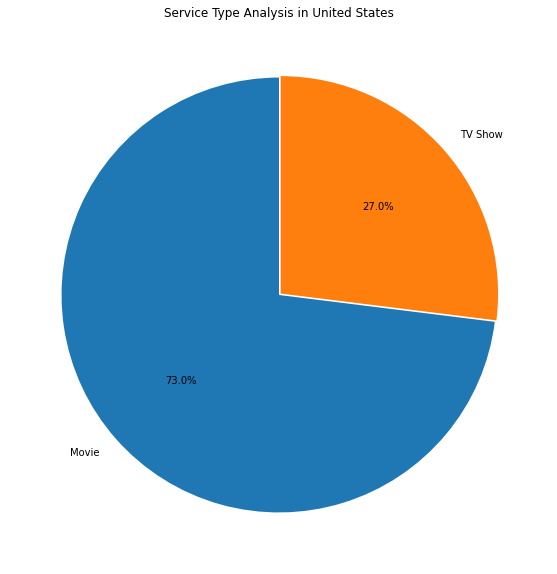

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))
plt.pie(netflix_usa['type'].value_counts(), labels = ['Movie', 'TV Show'], 
        startangle = 90, explode = (0, 0.01), autopct = '%1.1f%%')
plt.title("Service Type Analysis in United States")

plt.show()

## 15 Directors who have more works in Netflix
### Marcus Raboy is the director who has the most number of works on the Netflix programs in the United States. 



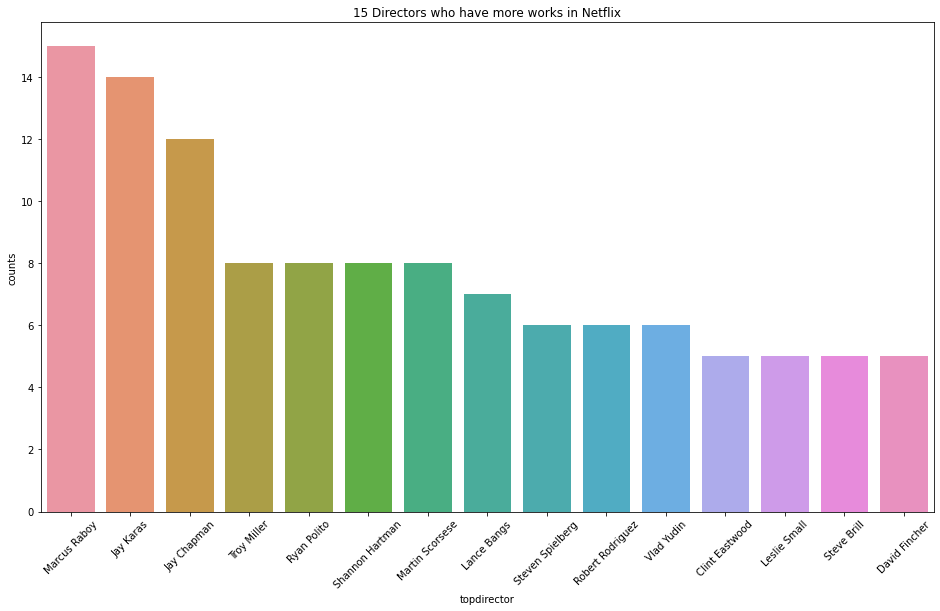

In [ ]:
director_count = netflix_usa['director'].dropna().value_counts()
directorsList = []
counts = []
for topdirector in netflix_usa.director.dropna().unique():
    directorsList.append(topdirector)
    counts.append(netflix_usa[(netflix_usa.director == topdirector)].show_id.count())
df = pd.DataFrame({'counts': counts , 'topdirector': directorsList})
df_sorted = df.sort_values(by=['counts'], ascending=False)
top15_directors = df_sorted.iloc[0:15: , : ]


fig, ax = plt.subplots(figsize = (16,9))
sns.barplot(data = top15_directors, x = 'topdirector', y = "counts")
plt.title("15 Directors who have more works in Netflix")
plt.xticks(rotation = 45);
plt.show()


# Most frequently casted actors in the United States

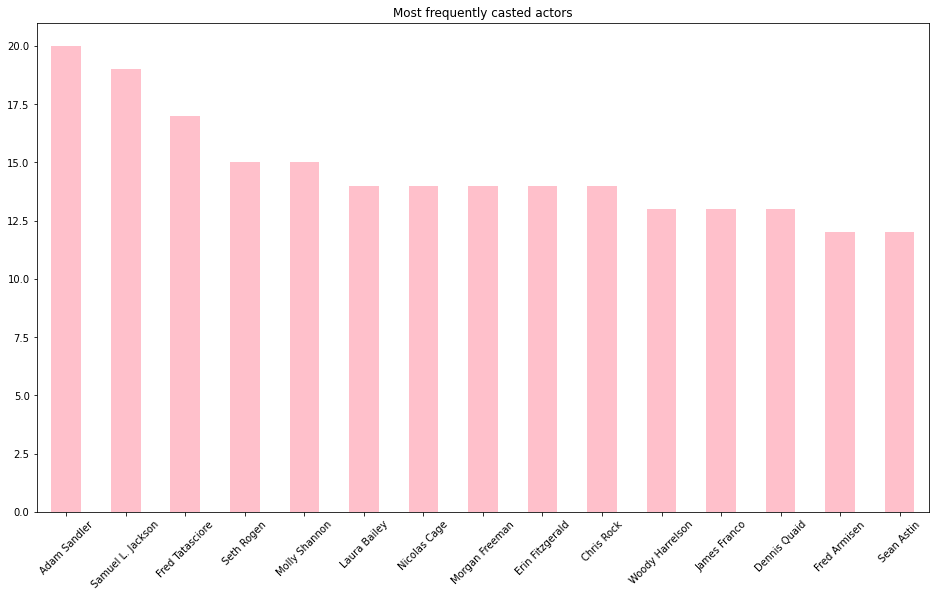

In [ ]:
df = netflix_usa.cast.dropna().str.replace(', ',',')
df_sorted = df.str.get_dummies(sep = ',').sum().sort_values(ascending=False)
top15_frequent_actors = df_sorted.iloc[0:15]
fig, ax = plt.subplots(figsize = (16,9))
color = 'pink'
lines = top15_frequent_actors.plot(kind = 'bar', color = color)
plt.title("Most frequently casted actors")
plt.xticks(rotation = 45);

# Service type trend by added year in the United States
### In the United States, Netflix added the most movies in 2019 and the most TV shows in 2020.  

Text(0.5, 1.0, 'Service Type Analysis in United States')

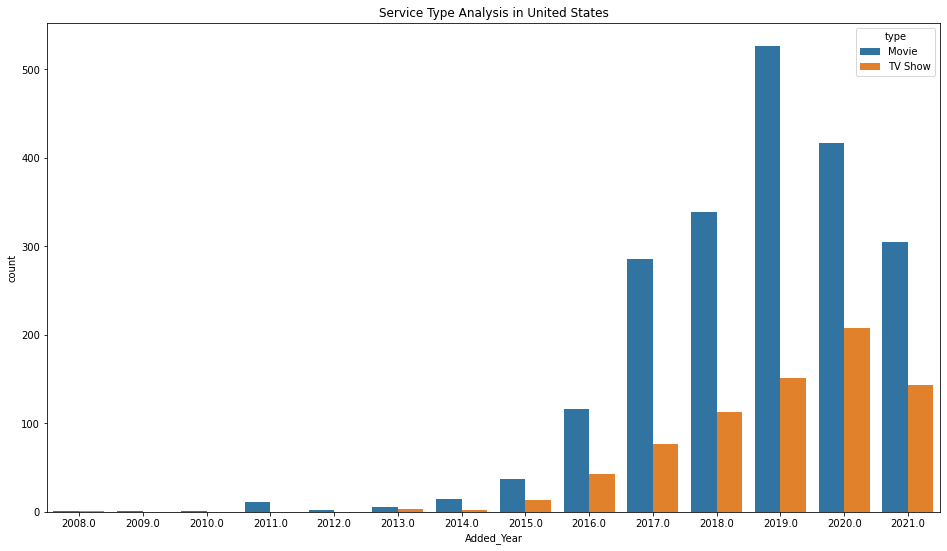

In [ ]:
fig, ax = plt.subplots(figsize = (16,9))
sns.countplot(data = netflix_usa, x=netflix_usa['Added_Year'], hue='type');
plt.title("Service Type Analysis in United States")


# Month trends for adding programs on the Neflix in the United States
### In January, Netflix tends to add the most programs while adding the least in May.

In January, Netflix added 299 programs in the United States. 

In May, Netflix added 188 programs in the United States.

January      299
November     264
July         253
December     243
September    241
August       233
October      231
March        224
April        220
June         216
February     200
May          188
Name: Added_Month, dtype: int64

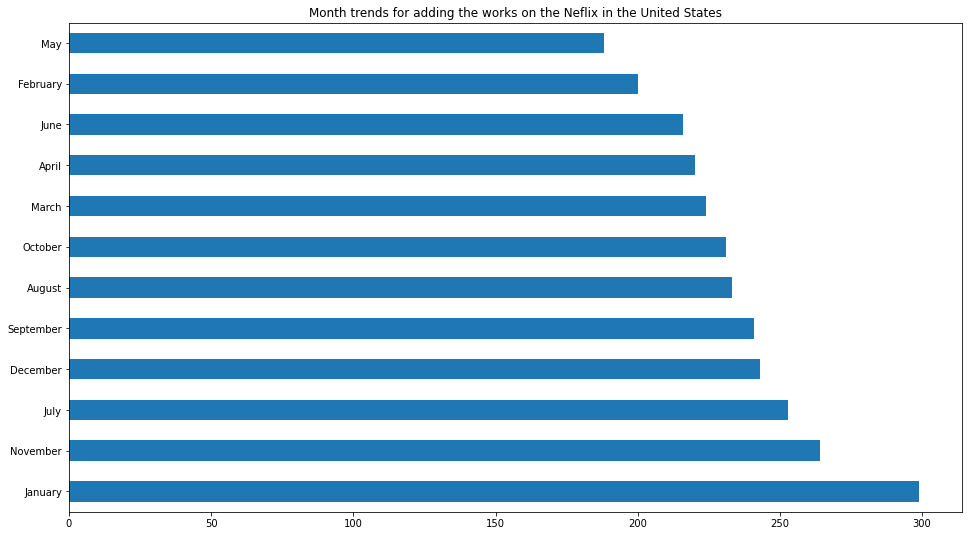

In [ ]:
fig, ax = plt.subplots(figsize = (16,9))
#netflix['Added_Month'] = netflix.date_added.str.split().str[0]
lines = netflix_usa['Added_Month'].value_counts().plot(kind = 'barh')
plt.title("Month trends for adding the works on the Neflix in the United States")
  
netflix_usa['Added_Month'].value_counts()


# Analysis by Rating in the United States
### TV-MA(TV Mature Audience Only) is the highest, and NC-17 is the lowest.

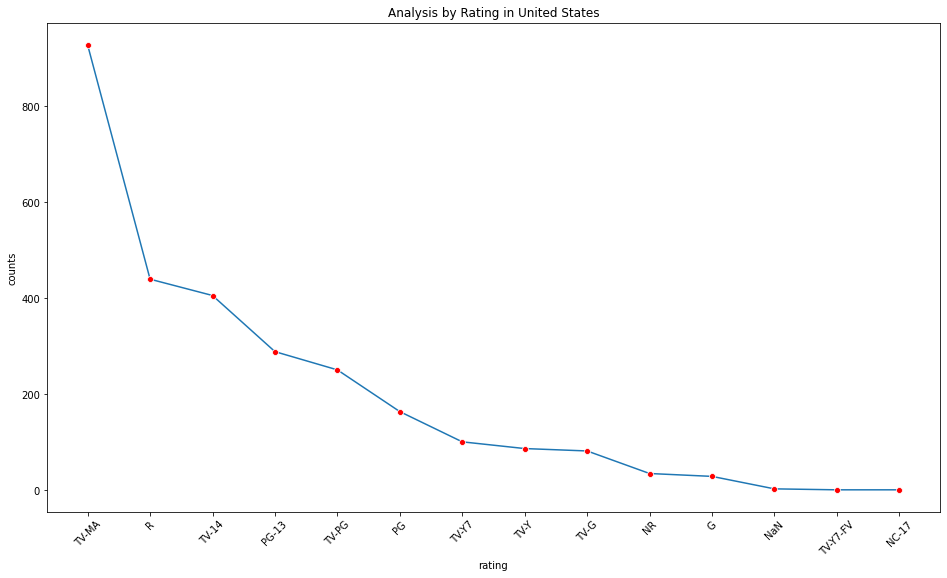

In [ ]:
netflix_usa['rating'].dropna().unique()
ratingList = []
counts = []
for ratings in netflix_usa.rating.dropna().unique():
    ratingList.append(ratings)
    counts.append(netflix_usa[(netflix_usa.rating == ratings)].show_id.count())
df = pd.DataFrame({'counts': counts , 'rating': ratingList})
df_sorted = df.sort_values(by=['counts'], ascending=False)
df_sorted
sorted_by_rating = df_sorted.iloc[0:14: , : ]
fig, ax = plt.subplots(figsize = (16,9))
sns.lineplot(data = sorted_by_rating, x = 'rating', y = "counts", marker = 'o', markerfacecolor = 'r')
plt.title("Analysis by Rating in United States")
plt.xticks(rotation=45);
plt.show()


## Distributions in rating by release_year in the United States
### Observation : Rating G movies tends not to be added recently. 

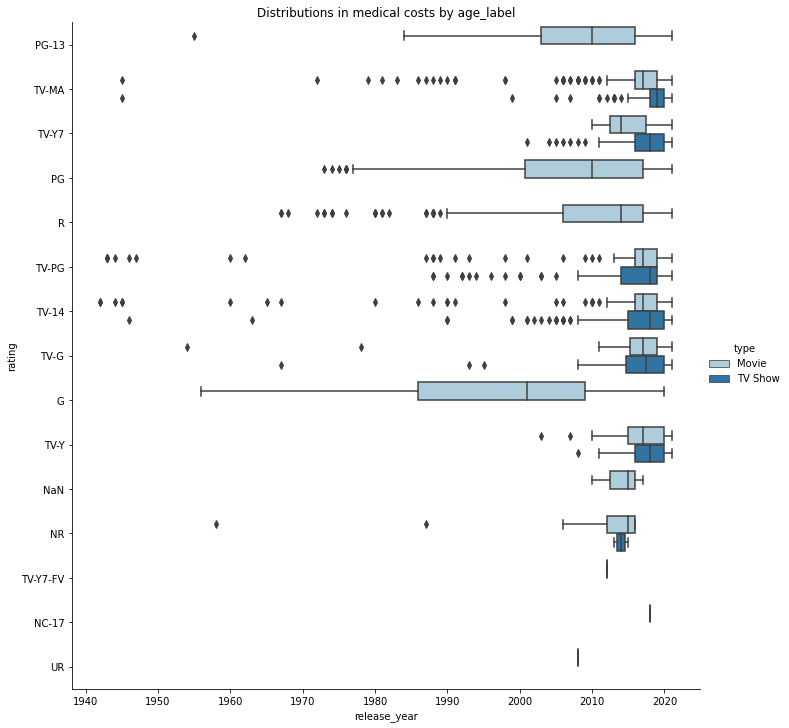

In [ ]:
sns.catplot(
    data=netflix_usa, 
    x="release_year",
    y="rating",
    aspect=1, # aspect change the aspect ratio
    kind="box",
    hue="type",
    height=10,
    palette="Paired"
    ) 
plt.title("Distributions in rating by release_year in the United States");

# Distributions in rating by added year in the United States.
### Observation : TV shows have fewer various rating levels compared to the Netflix services in the world. 


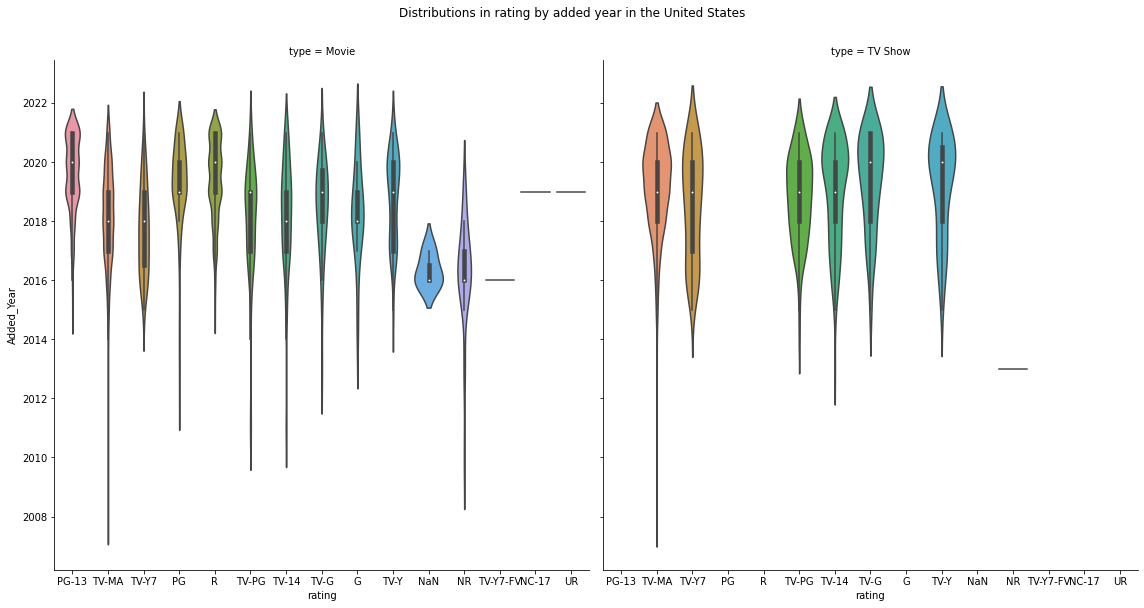

In [ ]:
g = sns.catplot(
    data=netflix_usa,
    x="rating",
    y="Added_Year",
    kind="violin",
    split=True,
    col="type",
    aspect= 1,
    height=8,
    s=2
   ) 
g.fig.suptitle("Distributions in rating by added year in the United States", y=1.05);

# Relationships between added year and release year for type in the United States

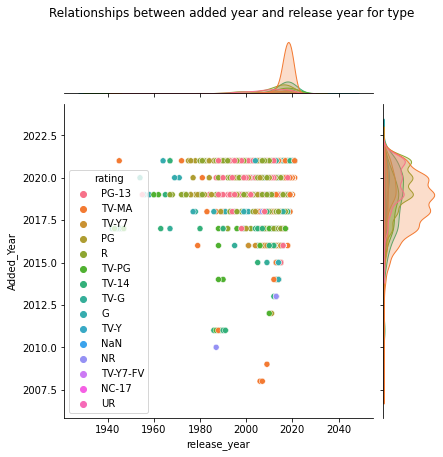

In [ ]:
g=sns.jointplot(
    data = netflix_usa,
    x = "release_year",
    y = "Added_Year",
    hue = "rating"    
)

g.fig.suptitle("Relationships between added year and release year for type", y=1.05);    